<div style = 'text-align:center'>

# Tarea n°2 del curso de introduccion al machine learning en `Python`

## Programador: Jose Gabriel Lopez Madrid 
### Correo: jglopezmad@gmail.com

## Fecha de creacion del script: 5/23/2023

## Fecha de entrega del script: 6/23/2023

</div>

<div style = 'text-align:justify'>

En esta primera celda de texto, colocare los modulos que usare en el resto del cuaderno, utilizo comentarios para indicar que hace cada modulo. Seguido de esto, obtengo los datos de entrenamiento asi como se mostro en el archivo de tarea. 

</div>

In [215]:
#Modulos matematicos
import pandas as pd

#Modulos de procesamiento de imagenes
import matplotlib.colors as clr
import matplotlib.pyplot as plt

#Modulos de procesamiento de datos, visualizacion via PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import datasets
from sklearn.model_selection import train_test_split

#Modulos de Arbol de decision

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Modulos del modelo de k-vecinos mas cercanos

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

#Obtencion de los datos de entrenamiento del paquete scikit-learn 
iris_dataset = datasets.load_iris()
x = iris_dataset.data
y = iris_dataset.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

<div style = 'text-align:justify'>

La funcion de matriz de confusion de kaggle, le hice un par de cambios a lo interno de la funcion para que me produjera un resultado mas aceptable esteticamente luego, pero son cambios menores. 

</div>

In [216]:
#Matriz de confusion de Kaggle, interesante, la utilizare para evaluar la calidad de la prediccion. 


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(visible=False)
    plt.show()

<div style = 'text-align:justify'>

Quiero revisar si los datos del modelo se correlacionan linealmente, voy a realizar una pequeña visualizacion de la matriz de correlacion para los datos del modelo. No manejo tanto contenido de estadistica avanzada, pero tengo entendido que el coeficiente de correlacion de pearson es el que nos dice si la correlacion entre variables es lineal, de modo que podemos reducir la dimensionalidad del modelo con PCA. 

</div>

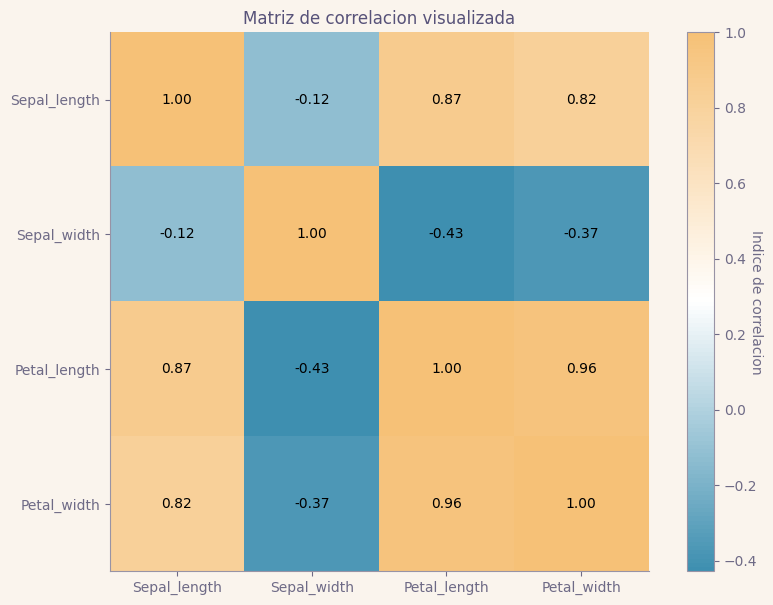

In [217]:
#Nombres de las columnas 
cols = ['Sepal_length','Sepal_width','Petal_length','Petal_width']

#Crear un dataframe para crear la matriz de correlacion 
df = pd.DataFrame(x,columns=cols)

colors = [(62/255, 143/255, 176/255),(1, 1, 1) , (246/255, 193/255, 119/255)] 
cm = clr.LinearSegmentedColormap.from_list(
        "Custom", colors, N=128)


mat = df.corr().round(3)
plt.figure(figsize=(10,7))
plt.grid(visible=False)
plt.imshow(mat,cmap=cm)
plt.yticks(ticks=range(0,4),labels=cols)
plt.xticks(ticks=range(0,4),labels=cols)
for i in range(0,4):
    for j in range(0,4):
        plt.text(i,j,f'{mat.values[i,j]:0.2f}', c = 'black',ha ='center', va = 'center')
plt.title('Matriz de correlacion visualizada')
plt.colorbar().ax.set_ylabel('Indice de correlacion', rotation = 270)
plt.show()

<div style = 'text-align:justify'>

Observo que hay una cuestion interesante y es que las longitudes de sepalo y petalo estan correlacionadas, lo mismo para la longitud de sepalo con ancho de petalo, lo que permite reducir las variables que tenemos aqui con el metodo de PCA que se realice en la siguiente parte. 

</div>

In [218]:
#Rutina de PCA
#Se que el vector de datos de entrenamiento es una lista de 4-tuplas. 

#Se transoforman los datos para generar un conjunto nuevo de datos que tengan una media de cero y una nueva desviacion estandar. 
x_std = StandardScaler().fit_transform(x_train)

#Lineas de codigo para implementar el algoritmo de PCA. 
pca = PCA(n_components=2)
pca.fit(x_std)

#Creacion del nuevo vector de datos para poder visualizar datos con el metodo de PCA.

new_X2D = pca.fit_transform(x_std)


<div style = 'text-align:justify'>

Se procede a realizar la visualizacion haciendo uso del metodo PCA, como se puede observar en la imagen, existen tres grupos mayoritarios bien definidos entre si, y, como se puede observar luego, uno de los grupos ya esta muy separado del resto, en este caso, el grupo `Setosa` esta separado del resto, mientras que los otros dos grupos de iris estan mezclados en una menor medida. 

</div>

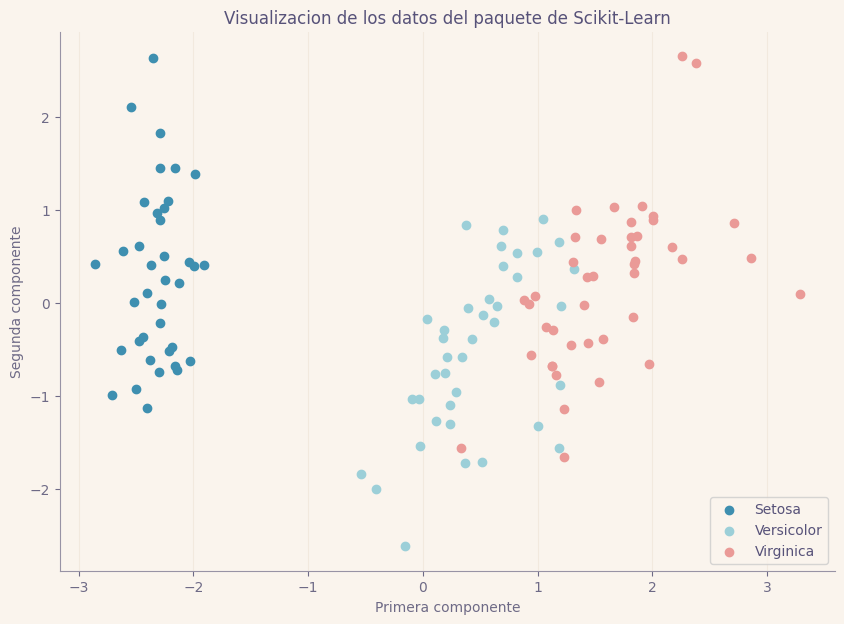

In [219]:
#Como utilizo los modulos de matplotlib para generar el vector de datos, lo que hare es primero configurar los colores de plotteo, conozco que los datos de entrenamiento pertenecen a 3 categorias, por lo que primero hare una visualizacion simple de estas tres categorias. 

#Colores del grafico

color_dict = {
    0:'#3e8fb0',
    1:'#9ccfd8',
    2:'#ea9a97'
}

#Se observa muy bien que los clusters formados por los datos estan relativamente separados entre si, lo que facilita poder realizar entrenamiento supervisado con facilidad. Aunque veo un ligero mezclado entre las categorias de Versicolor y Virginica, aunque presiento que no seran tan significativas en el algoritmo final. 
plt.style.use("https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle")
plt.figure(figsize=(10,7))
#Crear los graficos usando un ciclo for, para facilitarme la labor de hacer el etiquetado de las categorias. 
for i in range(0,3):
    plt.scatter(x=new_X2D[:,0][y_train == i], y=new_X2D[:,1][y_train == i], c = color_dict[i])

#Opciones varias del grafico 
plt.grid() #La rejilla
plt.xlabel('Primera componente') #La componente numero uno de la visualizacion 
plt.ylabel('Segunda componente') #La segunda componente de la visualizacion
plt.title('Visualizacion de los datos del paquete de Scikit-Learn') #Titulo
plt.legend(['Setosa', 'Versicolor', 'Virginica'], loc = 'lower right') #Leyenda
plt.show() #Para mostrar el grafico si utilizara un script de terminacion '.py'. 


In [220]:
#Uso del modulo de scikit-learn para el estudio de arboles de decision como clasificadores para la muestra. 

tree_choice = tree.DecisionTreeClassifier()

#Entrenamiento de modelos de arbol de decision

tree_choice = tree_choice.fit(x_train, y_train)


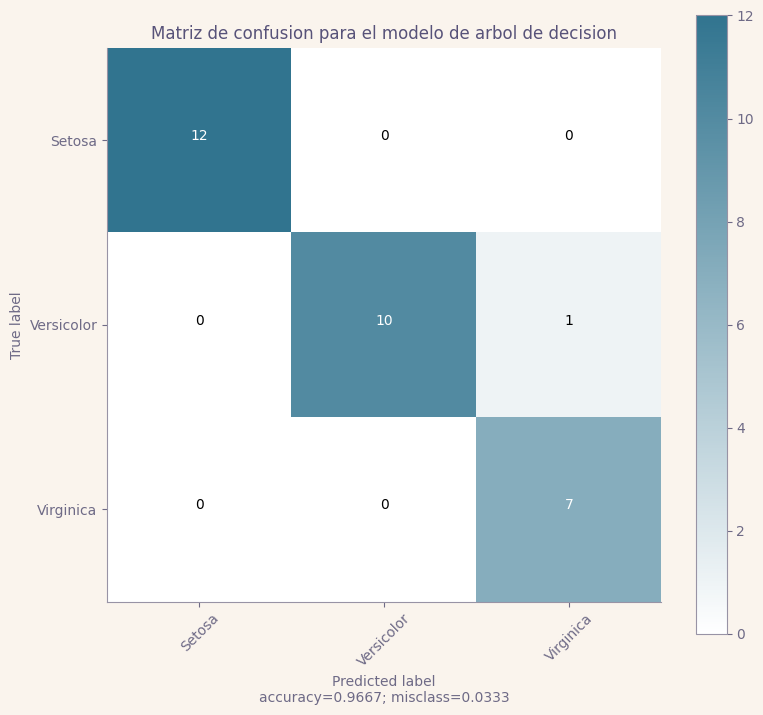

In [221]:
#Se observan las predicciones hechas por el modelo sobre el conjunto de prueba. 

predictions = tree_choice.predict(X=x_test)

#Se crea la grafica de matriz de confusion para revisar la efectividad del modelo. 

confus_m = confusion_matrix(
    y_true=y_test,
    y_pred=predictions
)

#Se crea el grafico de matriz de confusion, usando la funcion de Kaggle

#Como la funcion de kaggle permite utilizar un mapa de colores por simplicidad, voy a generar uno.
#Generado del mapa de colores 

colors = [(1, 1, 1), (49/255, 116/255, 143/255)] # 
cm = clr.LinearSegmentedColormap.from_list(
        "Custom", colors, N=256)


plot_confusion_matrix(
    confus_m,
    target_names=['Setosa', 'Versicolor', 'Virginica'],
    title='Matriz de confusion para el modelo de arbol de decision',
    normalize=False,
    cmap=cm
)

#Observando el grafico, puedo observar que la precision del modelo es bastante buena, considerando que tengo una precision del 93.3% para este modelo (en una ejecucion de este codigo), lo que me indica que el modelo es robusto para clasificar las categorias anteriores, interesante. 

In [222]:
answer = accuracy_score(y_true = y_test, y_pred = predictions) 
#Veo que la precision oscila entre el 89% y el 93%, imagino que esto se debe a factores aleatorios, pero quisiera consultar con el docente para ver si de repente existe alguna estrategia para poder ponderar mas resultados considerando que corremos el codigo mas veces. 
print(f'El modelo tiene una precision de {answer:.2%}')

El modelo tiene una precision de 96.67%


<div style = 'text-align:justify'>

Se observa que en base a los resultados que obtuve, tanto de la matriz de confusion y de la funcion `accuracy_score`, tengo resultados que varian entre el 88% y el 96% de precision en la prediccion, lo que muestra que el modelo entrenado mediante este esquema posee una robustez aceptable para nuestros propositos. Por lo demas, es interesante notar que si bien esto es cierto para esta ejecucion de nuestro modelo, es necesario realizar una prueba mas grande de ejecuciones de nuestro codigo para poder validar la precision del mismo. Dado que he notado que la precision puede variar en menor medida por factores aleatorios de la prediccion. Sin mencionar mas cuestiones, en la siguiente parte de este cuaderno colocare el algoritmo para poder realizar la prueba del algortimo de `k-vecinos mas cercanos`, para poder comparar resultados entre modelos. 

</div>

In [223]:
#Implementacion del modelo de k-vecinos mas cercanos 

# Voy a revisar para vecinos de 3 a 5 y ver como mejoran los resultados. Por lo que usare un ciclo for para facilitar ese trabajo

k_vecinos = [3,4,5]

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

model = []
for i in k_vecinos:
    model.append(KNeighborsClassifier(i))
    print(model)

for i in range(0,3):
    model[i] = model[i].fit(x_train,y_train)

# Tengo una variable "model" que me guarda los modelos de k vecinos mas cercanos para un cierto numero de k vecinos, por lo que ahora solo resta observar como se comporta el modelo dependiendo del numero de vecinos. 

# Escalamos nuestros datos, para revisar como se comportan los modelos frente a diferentes numeros de vecinos. 

x_test = scaler.fit_transform(x_test)


[KNeighborsClassifier(n_neighbors=3)]
[KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=4)]
[KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=4), KNeighborsClassifier()]


<div style = 'text-align:justify'>

Se realizan las predicciones correspondientes, para validar el modelo frente a diferentes numeros de vecinos. Utilizo un ciclo `for` para evaluar las metricas de desempeño de un plomazo. 

</div>

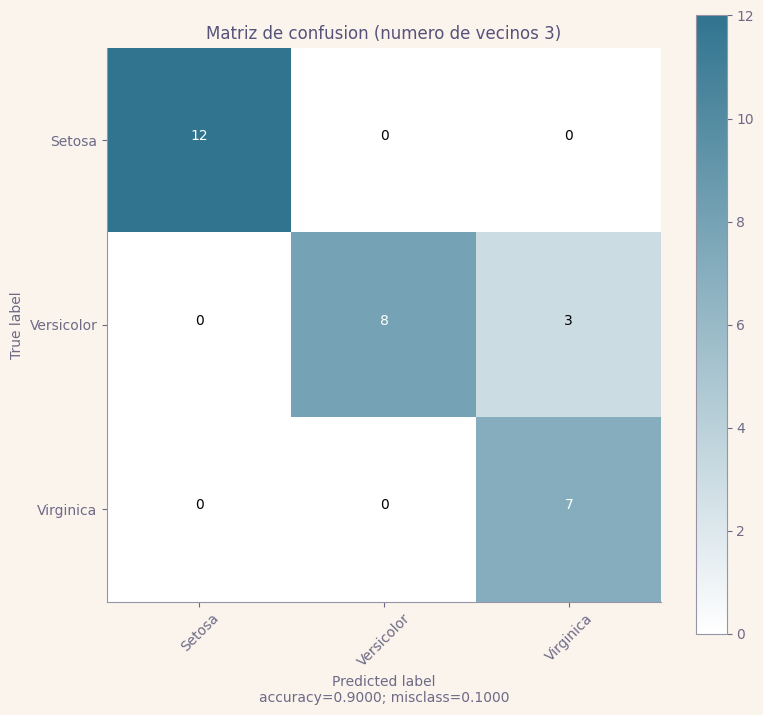

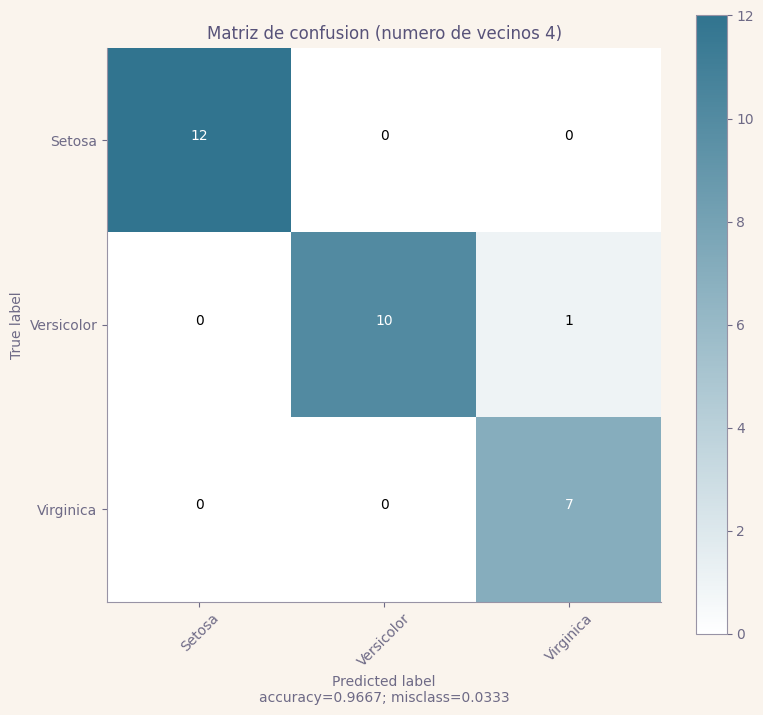

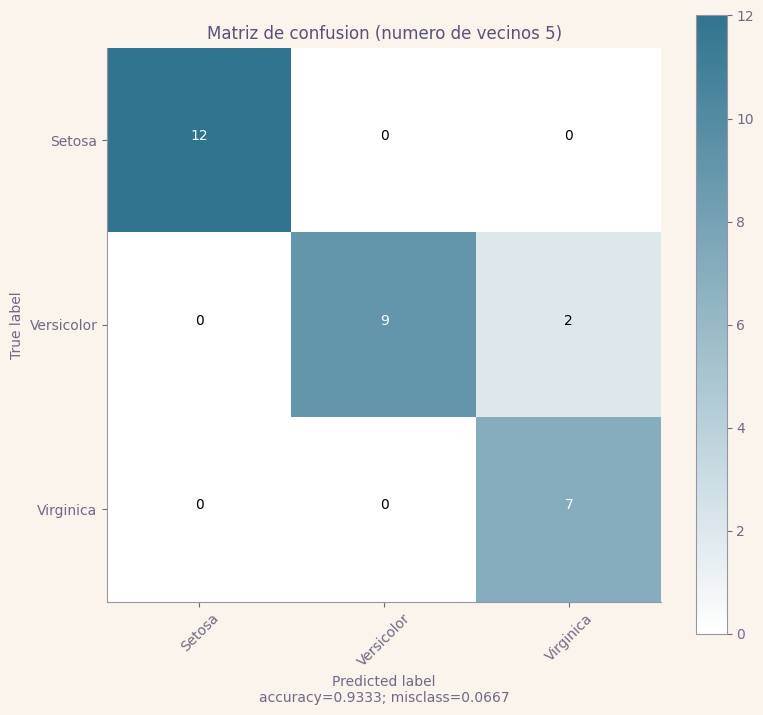

In [224]:
k_predictions = []
matrix_lst = []
for i in range(0,3):
    k_predictions.append(model[i].predict(X = x_test))
    matrix_lst.append(confusion_matrix(
        y_true = y_test,
        y_pred = k_predictions[i]
    ))
    plot_confusion_matrix(
        matrix_lst[i],
        target_names=['Setosa', 'Versicolor', 'Virginica'],
        title=f'Matriz de confusion (numero de vecinos {i+3})',
        cmap= cm,
        normalize=False
    )

In [225]:
for i in range(0,3):
    answer = accuracy_score(y_true = y_test, y_pred = k_predictions[i]) 
    #Veo que la precision oscila entre el 89% y el 93%, imagino que esto se debe a factores aleatorios, pero quisiera consultar con el docente para ver si de repente existe alguna estrategia para poder ponderar mas resultados considerando que corremos el codigo mas veces. 
    print(f'El modelo con {i+3}-vecinos tiene una precision de {answer:.2%}')

El modelo con 3-vecinos tiene una precision de 90.00%
El modelo con 4-vecinos tiene una precision de 96.67%
El modelo con 5-vecinos tiene una precision de 93.33%


<div style = 'text-align:justify'>

Considerando que se entrenaron tres modelos, se nota que los tres modelos tienen resultados similares, en este caso, se observa que los resultados del modelo de `k-vecinos` son comparables con el modelo de `arbol de decision`, pero note que en algunos de las ejecuciones de todo el cuaderno, el indicador de precision del modelo de `arbol` puede bajar del 90%, por lo que hasta cierto punto, `k-vecinos` entrega resultados mejores en repetidas instancias de ejecucion del presente cuaderno. 

</div>